<a href="https://colab.research.google.com/github/Shubham-Das-Coder/ML_And_DL_Projects/blob/main/Color_Image_To_Pencil_Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install imageio package
!pip install imageio

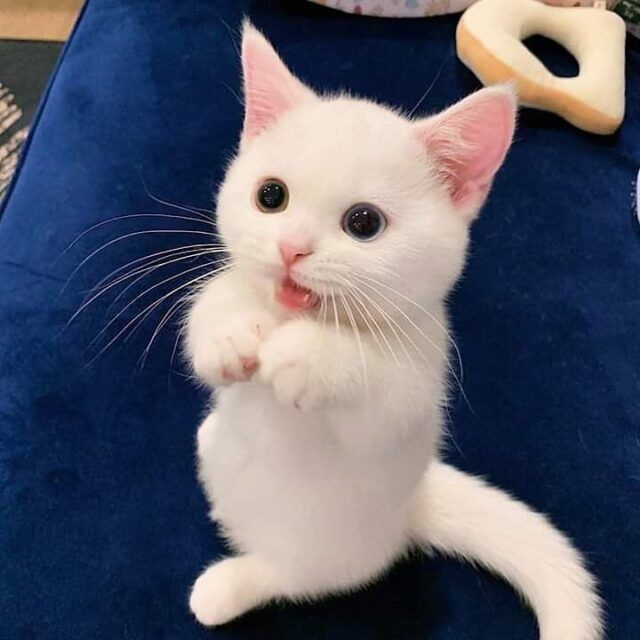

In [2]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

#Display the image from the web using an URL
img="https://i.pinimg.com/736x/bd/9c/93/bd9c931ca152a2323a4293ff5ad9846b.jpg"
dp.Image(requests.get(img).content)

In [3]:
#Read the image using imageio package's imread method and URL from web
source_img=imageio.imread(img)

In [4]:
#Make the image black and white using the formula Y=0.299*R+0.587*G+0.114*B i.e. by applying greyscale 
import numpy as np

def grayscalimg(rgb):
    return np.dot(rgb[...,:3],[0.299,0.587,0.114])

gryscl_img=grayscalimg(source_img)

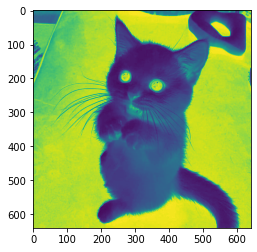

In [5]:
#Invert the image by subtracting it from 255
inv_img=(255-gryscl_img)
plt.imshow(inv_img)

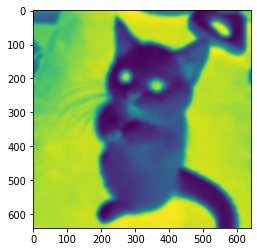

In [6]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img=scipy.ndimage.filters.gaussian_filter(inv_img,sigma=5)
plt.imshow(blurred_img)

In [7]:
#Create a function to perform dodging(blending together greyscale and blurred image)
def dodging(blur_img,gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img)
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [8]:
#Generate the target image by applying the dodge
target_img=dodging(blurred_img,gryscl_img)

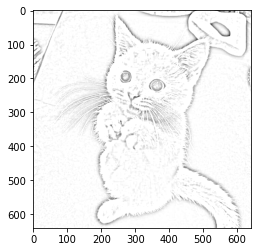

In [9]:
#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img,cmap="gray")

In [10]:
#Save the image
plt.imsave('target_image.png',target_img,cmap='gray',vmin=0,vmax=255)